# **Predicting NBA Player Performance**

## **Project Summary**
**Predicting NBA Player Performance Using Regression Models**  
This project aims to analyze historical data of NBA players to predict their game performance metrics, such as points, rebounds, and assists. By leveraging regression techniques and feature engineering, the project will identify key factors influencing player performance. This can provide valuable insights for teams, analysts, and scouts to make data-driven decisions and optimize strategies.




## **Problem Statement**

The data is related to the historical performance of NBA players across multiple seasons. It includes various statistics such as points scored, rebounds, assists, and advanced metrics like true shooting percentage and usage rate. The goal is to use this data to predict a player's game performance metrics (e.g., game score) using regression models. By identifying the most impactful features, the project aims to provide insights into factors that influence player performance and develop a predictive framework for future analysis.


### Description of Each Feature

- **Unnamed: 0**: Index column, possibly not relevant for modeling.
- **player_name**: Name of the player.
- **team_abbreviation**: Abbreviation of the player's team.
- **age**: Age of the player.
- **player_height**: Height of the player in inches.
- **player_weight**: Weight of the player in pounds.
- **college**: College where the player played before entering the NBA (if applicable).
- **country**: Country of origin of the player.
- **draft_year**: The year the player was drafted into the NBA.
- **draft_round**: The round in which the player was selected during the draft.
- **draft_number**: The draft pick number at which the player was selected.
- **gp**: Games played by the player during the season.
- **pts**: Points scored by the player in a game.
- **reb**: Rebounds grabbed by the player in a game.
- **ast**: Assists made by the player in a game.
- **net_rating**: Net rating of the player based on their performance on the court.
- **oreb_pct**: Offensive rebound percentage of the player.
- **dreb_pct**: Defensive rebound percentage of the player.
- **usg_pct**: Usage percentage of the player, indicating how often they use a possession.
- **ts_pct**: True shooting percentage, a measure of shooting efficiency.
- **ast_pct**: Assist percentage, indicating the player's contribution to assists.
- **season**: The NBA season for the data.


In [39]:
#For matrix and array operations
import numpy as np
#For data manipulation
import pandas as pd
#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif
#For data splitting
from sklearn.model_selection import train_test_split

#For model building# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For feature scaling

# Importing algorithams for building model
from sklearn.linear_model import LinearRegression, Ridge 

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [40]:
# Load the dataset
df=pd.read_csv('all_seasons.csv')
# Display the first five rows of the dataset
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [41]:
# last 5 rows of the dataset
df.tail()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,66,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,19,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,71,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,52,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23
12843,12843,JaMychal Green,GSW,33.0,205.74,102.965384,Alabama,USA,Undrafted,Undrafted,Undrafted,57,6.4,3.6,0.9,-8.2,0.087,0.164,0.169,0.650,0.094,2022-23


### Data inspection

In [42]:
# Checking the shape of the dataset
df.shape

(12844, 22)

- Dataset contain the 12844 rows and 22 columns.

In [43]:
# checking the columns of the dataset
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [44]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

- In the dataset most of the features are float and it also have object and int type features.

In [45]:
# Basic discription of the dataset
df.describe(include='all')

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
count,12844.000000,12844,12844,12844.000000,12844.000000,12844.000000,10990,12844,12844,12844,12844,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844
unique,NaN,2551,36,NaN,NaN,NaN,356,82,48,9,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
top,NaN,Vince Carter,CLE,NaN,NaN,NaN,Kentucky,USA,Undrafted,1,Undrafted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
freq,NaN,22,450,NaN,NaN,NaN,447,10721,2358,7351,2414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605
mean,6421.500000,NaN,NaN,27.045313,200.555097,100.263279,NaN,NaN,NaN,NaN,NaN,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595,NaN
std,3707.887763,NaN,NaN,4.339211,9.111090,12.426628,NaN,NaN,NaN,NaN,NaN,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172,NaN
min,0.000000,NaN,NaN,18.000000,160.020000,60.327736,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3210.750000,NaN,NaN,24.000000,193.040000,90.718400,NaN,NaN,NaN,NaN,NaN,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000,NaN
50%,6421.500000,NaN,NaN,26.000000,200.660000,99.790240,NaN,NaN,NaN,NaN,NaN,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000,NaN
75%,9632.250000,NaN,NaN,30.000000,208.280000,108.862080,NaN,NaN,NaN,NaN,NaN,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000,NaN


In [46]:
# Checking duplicates values in the datset
duplicates=df.duplicated().sum()
print("No of duplicates in the dataset are:",duplicates)

No of duplicates in the dataset are: 0


In [47]:
# Checking null values in the datset
null_values=pd.DataFrame({'Columns':df.columns, 'No of Null values':df.isna().sum()})
null_values.set_index('Columns').sort_values(by='No of Null values',ascending=False)

,No of Null values
Columns,
college,1854
Unnamed: 0,0
team_abbreviation,0
age,0
player_height,0
player_name,0
player_weight,0
country,0
draft_year,0


#### <u>Observation</u>
- The dataset contains the 12844 rows and 22 columns
- The dataset have no duplicates rows
- The dataset has null values in only one column 'college'.

### Understanding the Features

In [48]:
df.describe(include='all')

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
count,12844.000000,12844,12844,12844.000000,12844.000000,12844.000000,10990,12844,12844,12844,12844,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844
unique,NaN,2551,36,NaN,NaN,NaN,356,82,48,9,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
top,NaN,Vince Carter,CLE,NaN,NaN,NaN,Kentucky,USA,Undrafted,1,Undrafted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
freq,NaN,22,450,NaN,NaN,NaN,447,10721,2358,7351,2414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605
mean,6421.500000,NaN,NaN,27.045313,200.555097,100.263279,NaN,NaN,NaN,NaN,NaN,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595,NaN
std,3707.887763,NaN,NaN,4.339211,9.111090,12.426628,NaN,NaN,NaN,NaN,NaN,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172,NaN
min,0.000000,NaN,NaN,18.000000,160.020000,60.327736,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3210.750000,NaN,NaN,24.000000,193.040000,90.718400,NaN,NaN,NaN,NaN,NaN,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000,NaN
50%,6421.500000,NaN,NaN,26.000000,200.660000,99.790240,NaN,NaN,NaN,NaN,NaN,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000,NaN
75%,9632.250000,NaN,NaN,30.000000,208.280000,108.862080,NaN,NaN,NaN,NaN,NaN,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000,NaN


In [49]:
# Finding categorical features
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 8 categorical variables
------------------------------------------------------------------------------------------
['player_name', 'team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'season']


In [50]:
# Finding the numerical features
numerical_variables = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical_variables)))

print('--'*45)
print(numerical_variables)

There are 14 numerical variables
------------------------------------------------------------------------------------------
['Unnamed: 0', 'age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']


### Data Wrangling and Feature Engineering

In [51]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [52]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [53]:
# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
college,1854,14.43
Unnamed: 0,0,0.00
team_abbreviation,0,0.00
age,0,0.00
player_height,0,0.00
player_name,0,0.00
player_weight,0,0.00
country,0,0.00
draft_year,0,0.00


- So only one column have null values 

In [54]:
# Count the unique college names
unique_colleges = df['college'].nunique()

# Display the result
print(f"The dataset contains {unique_colleges} unique college names.")


The dataset contains 356 unique college names.


It is better to drop the college column beacuse it have 356 unique names so encoding 356 unique values (e.g., through one-hot or label encoding) would add unnecessary complexity, especially for a column that likely has limited predictive power for current player performance.

In [55]:
# Dropping the 'college' column
df = df.drop(columns=['college'])
print("'college' column has been dropped from the dataset.")


'college' column has been dropped from the dataset.


In [56]:
# Verify for null values are removed
df.isna().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [57]:
# Check unique values for categorical columns
categorical_features = ['player_name', 'team_abbreviation', 'country', 
                        'draft_year', 'draft_round', 'draft_number', 'season']

# Print unique value counts for each column
for feature in categorical_features:
    unique_values = df[feature].nunique()
    print(f"{feature} has {unique_values} unique values.")


player_name has 2551 unique values.
team_abbreviation has 36 unique values.
country has 82 unique values.
draft_year has 48 unique values.
draft_round has 9 unique values.
draft_number has 76 unique values.
season has 27 unique values.


#### Handling Outliers

__________________________________________________________________________________________


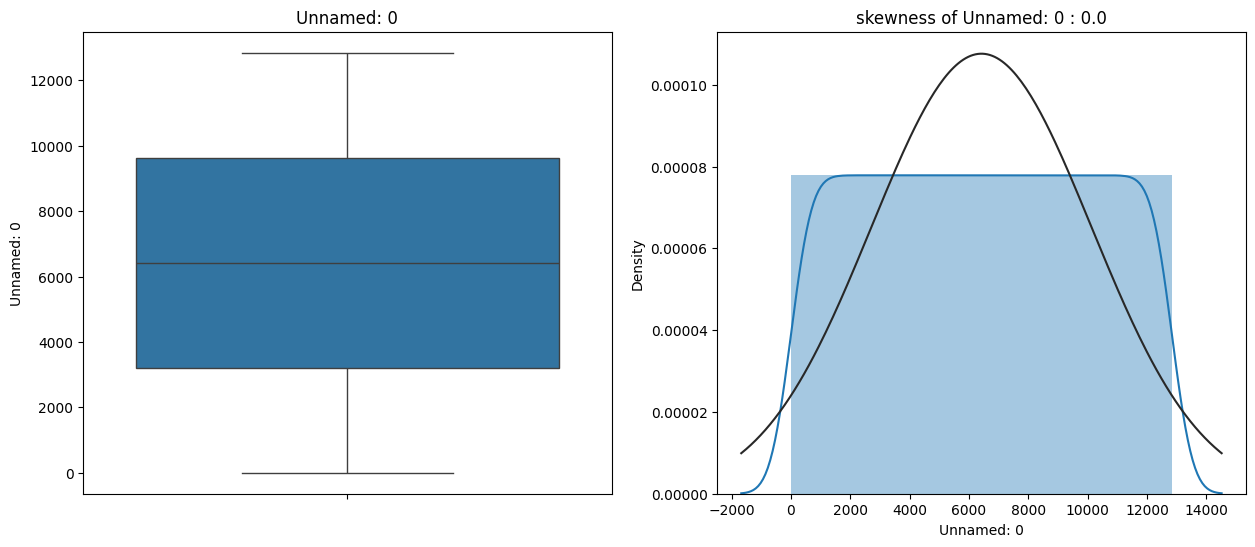

__________________________________________________________________________________________


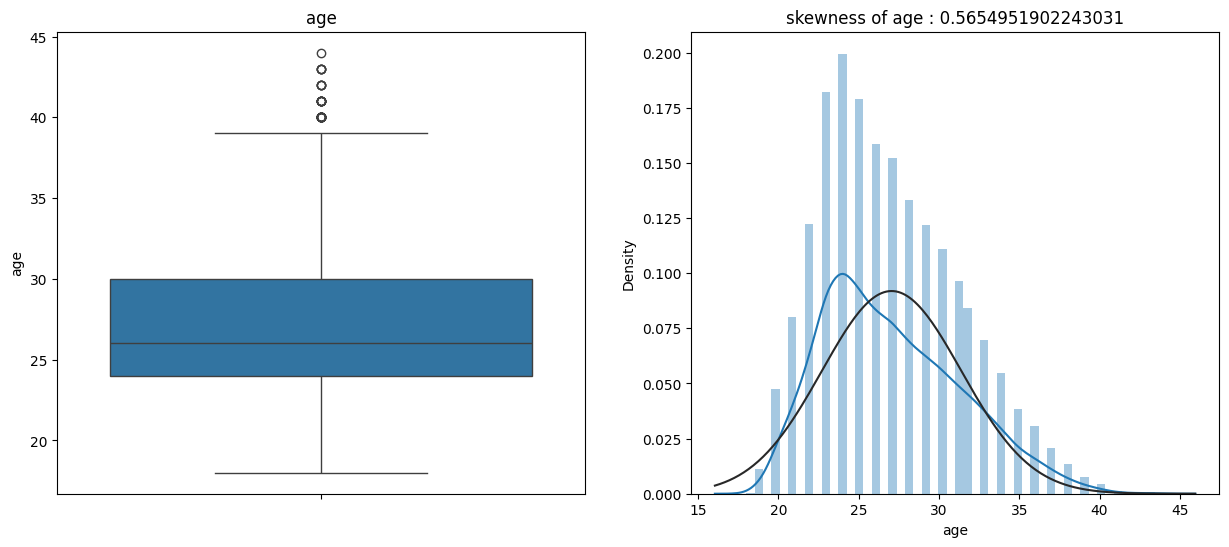

__________________________________________________________________________________________


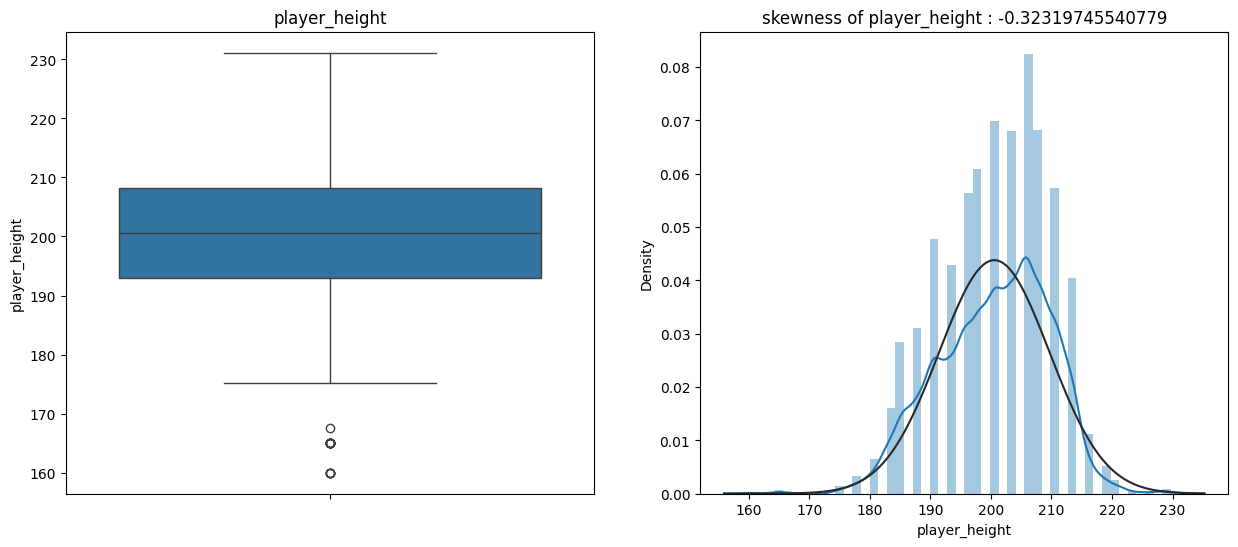

__________________________________________________________________________________________


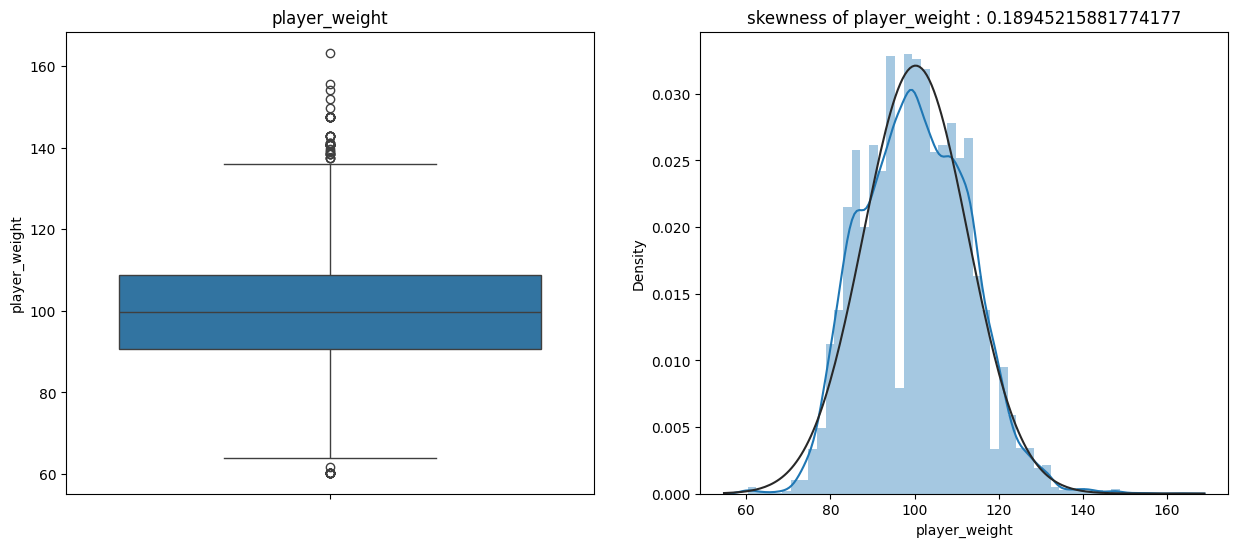

__________________________________________________________________________________________


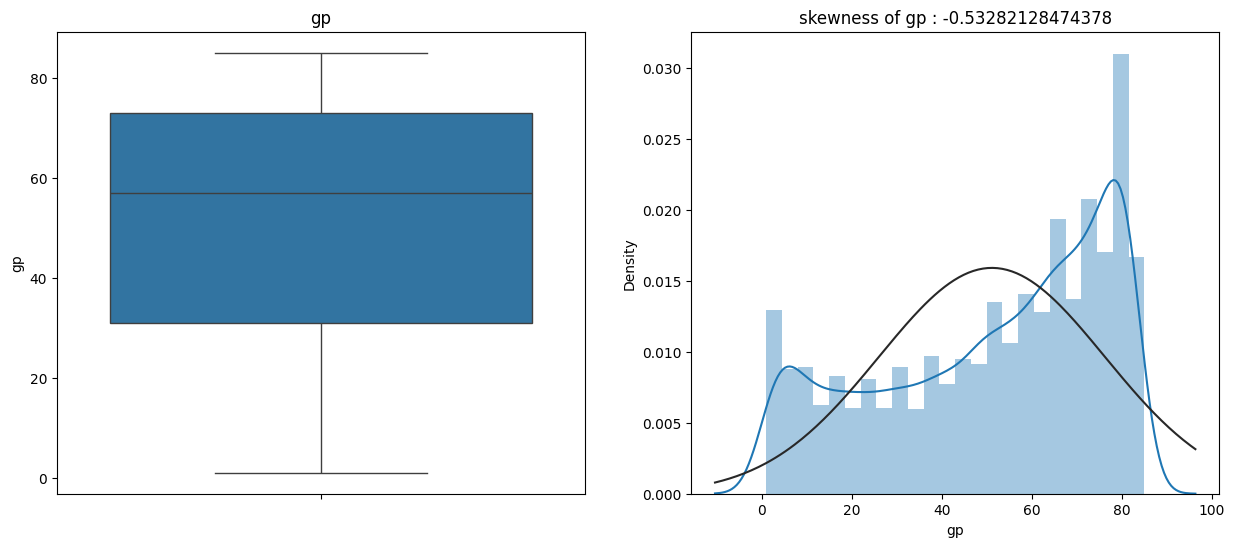

__________________________________________________________________________________________


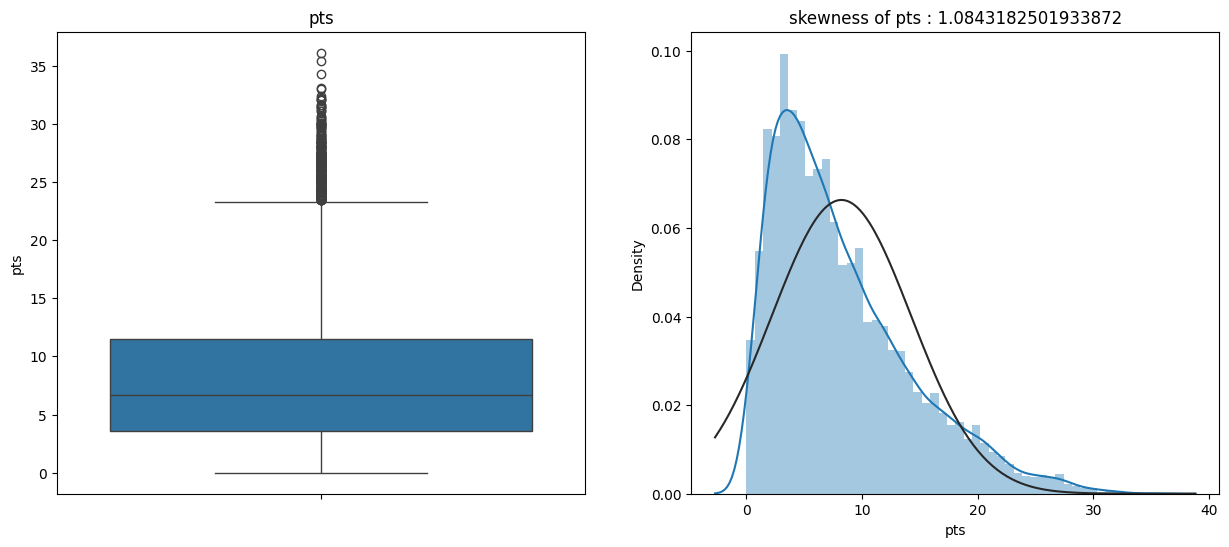

__________________________________________________________________________________________


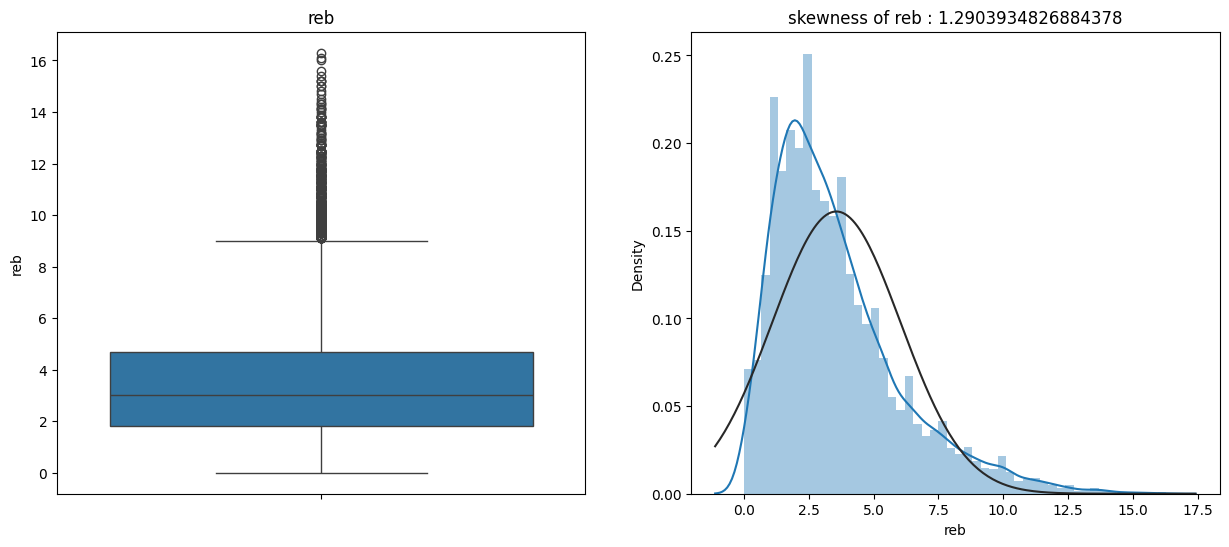

__________________________________________________________________________________________


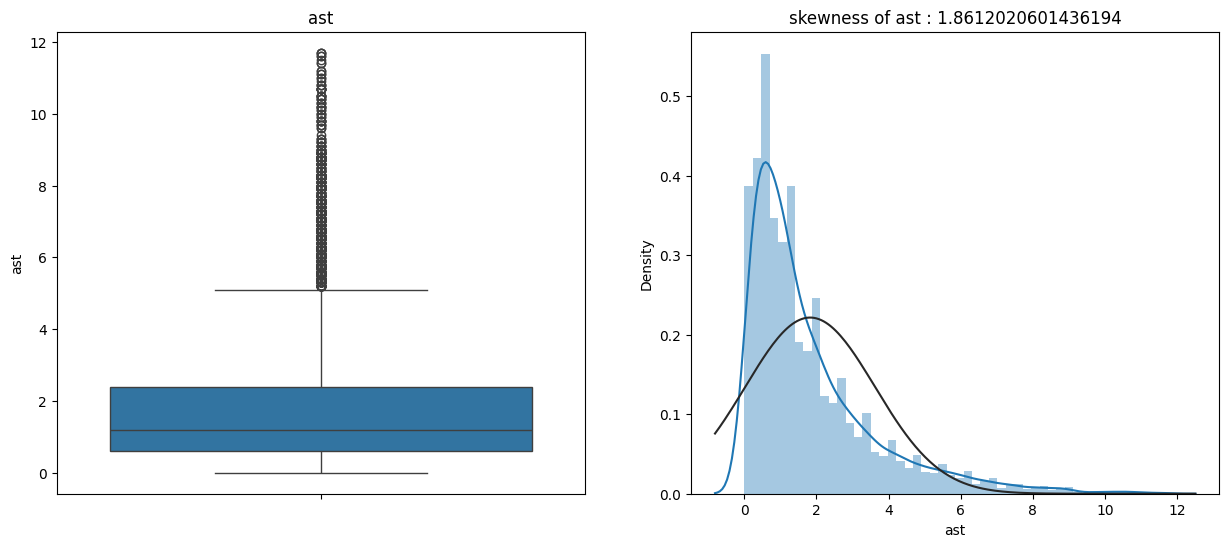

__________________________________________________________________________________________


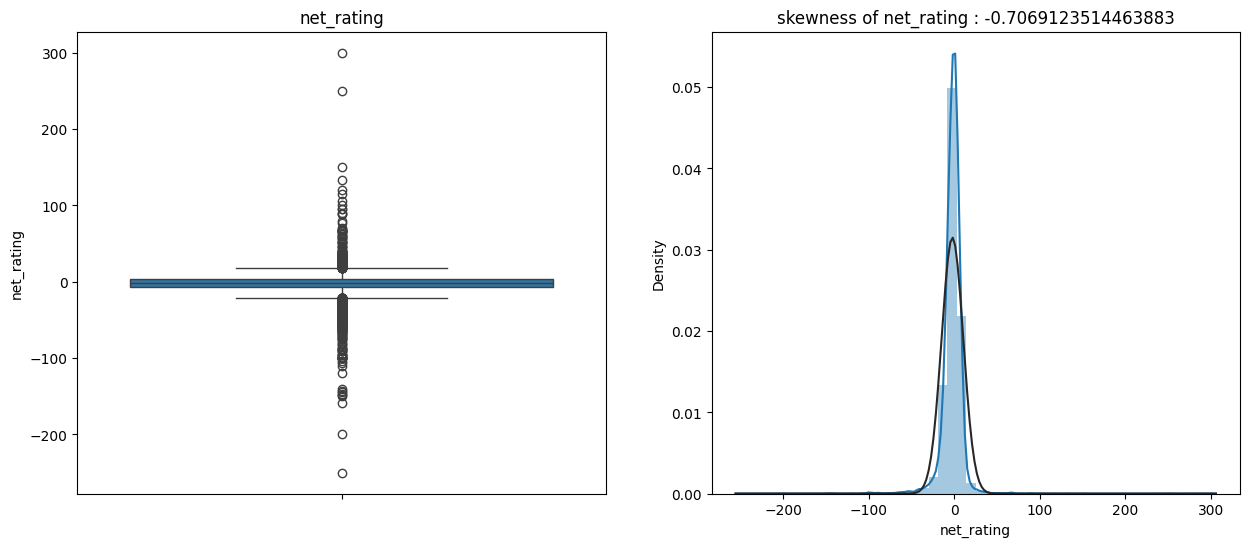

__________________________________________________________________________________________


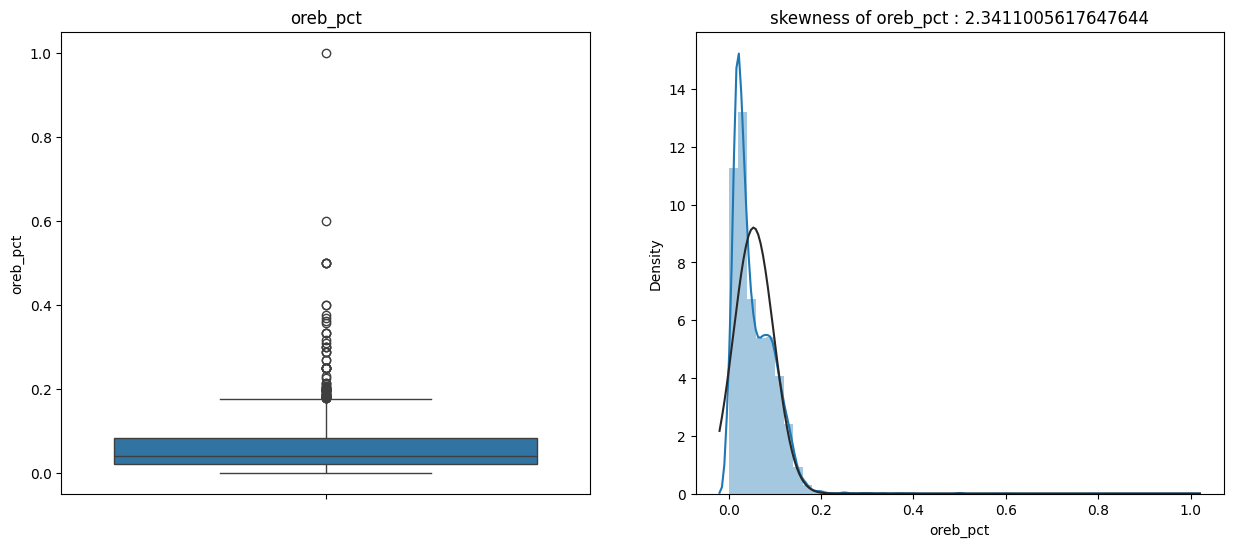

__________________________________________________________________________________________


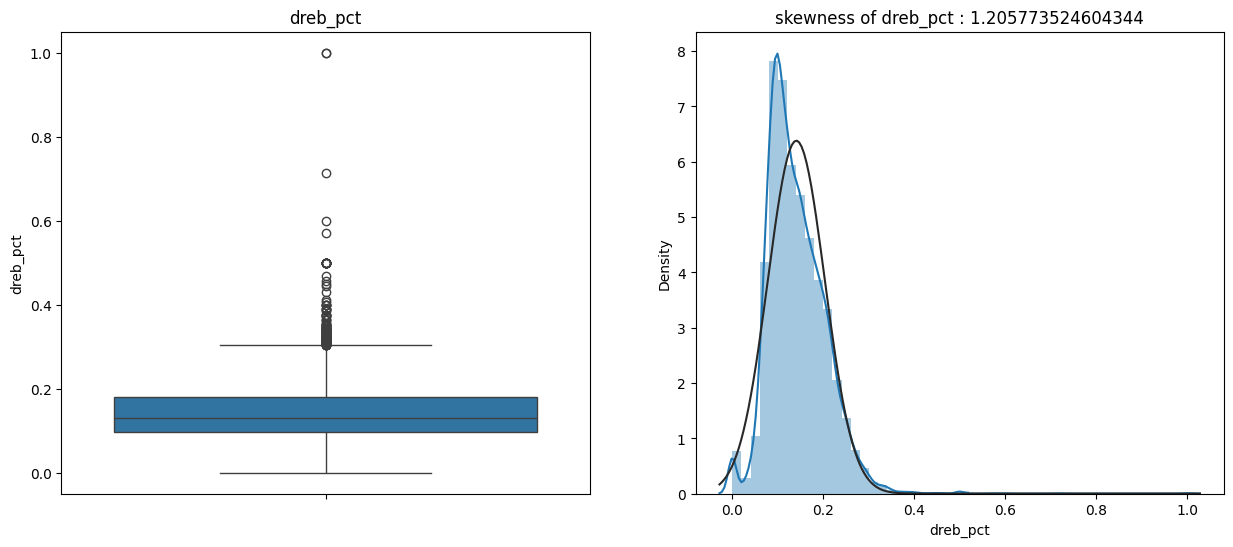

__________________________________________________________________________________________


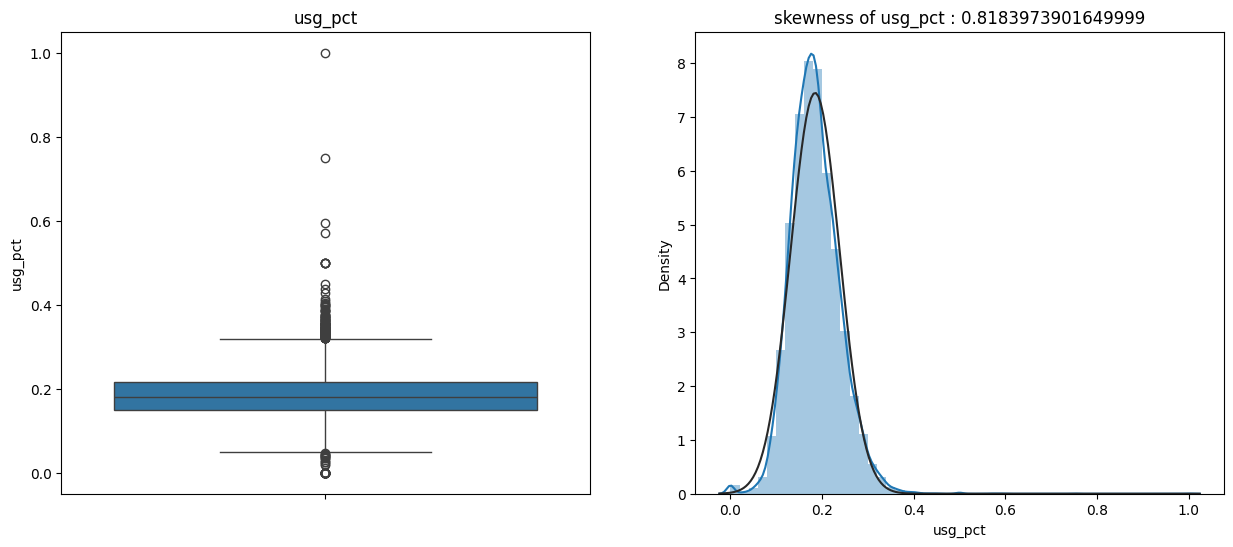

__________________________________________________________________________________________


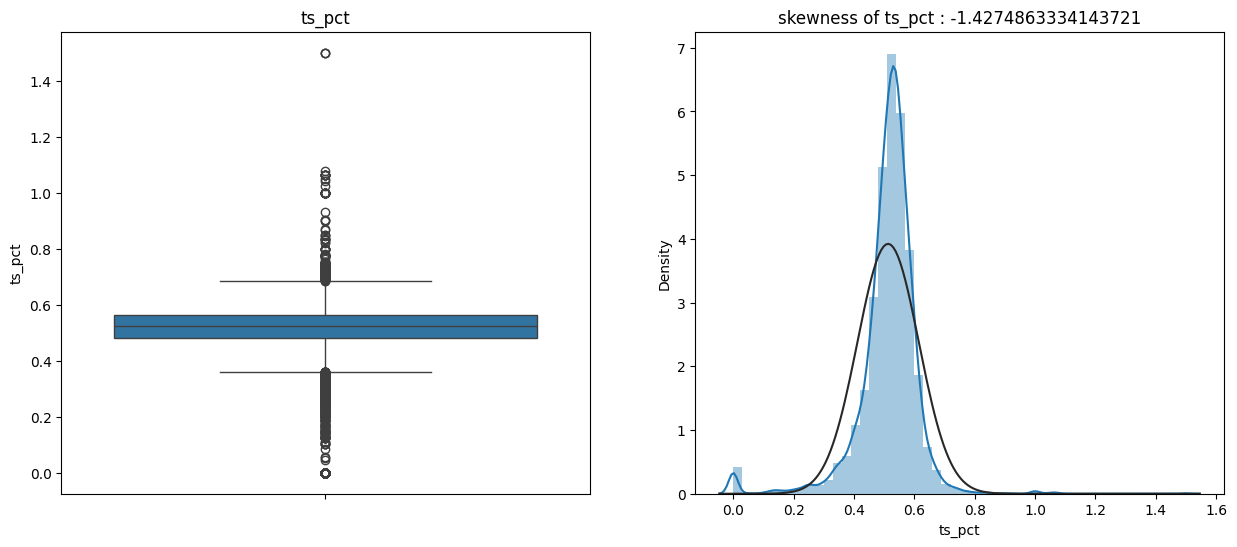

__________________________________________________________________________________________


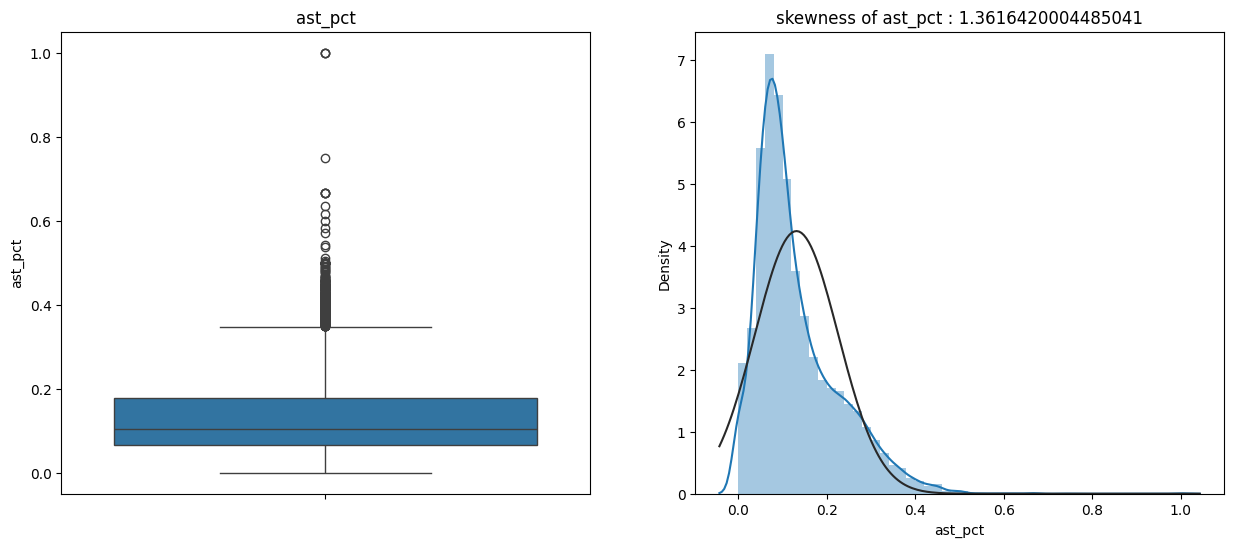

In [58]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()


Certain features, including Pts, Reb, Ast, Net_rating, Dreb_pct, Ts_pct, and Ast_pct, exhibit outliers representing exceptional player performances or unique game scenarios. These outliers may impact model training and require careful handling through techniques like scaling or capping.

In [59]:
# Defining variables with outliers
outlier_var = ['pts', 'reb', 'ast', 'net_rating', 'dreb_pct', 'ts_pct', 'ast_pct']

# Capping dataset using IQR
for i in outlier_var:
    # Finding IQR
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    # Defining upper and lower limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Applying limits to cap outliers
    df.loc[df[i] > upper_limit, i] = upper_limit
    df.loc[df[i] < lower_limit, i] = lower_limit

print("Outliers have been capped using the IQR method.")


Outliers have been capped using the IQR method.


__________________________________________________________________________________________


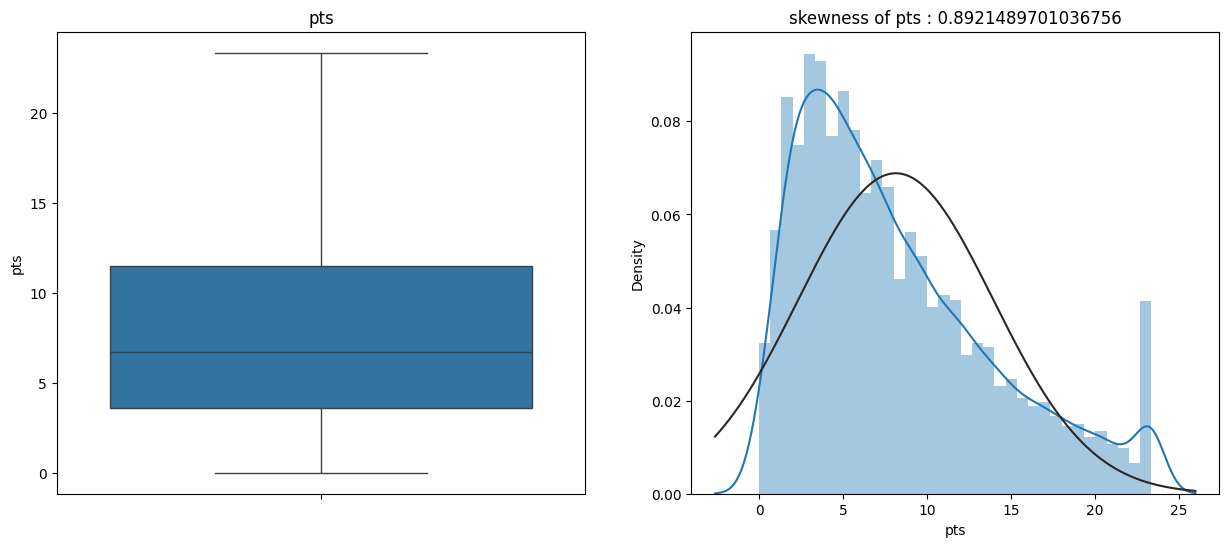

__________________________________________________________________________________________


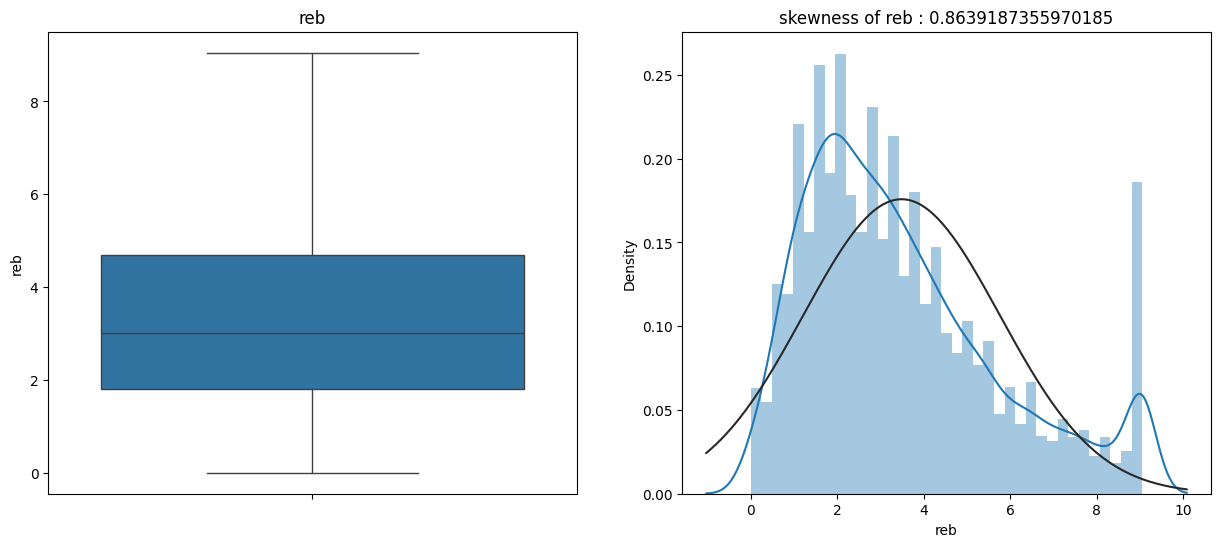

__________________________________________________________________________________________


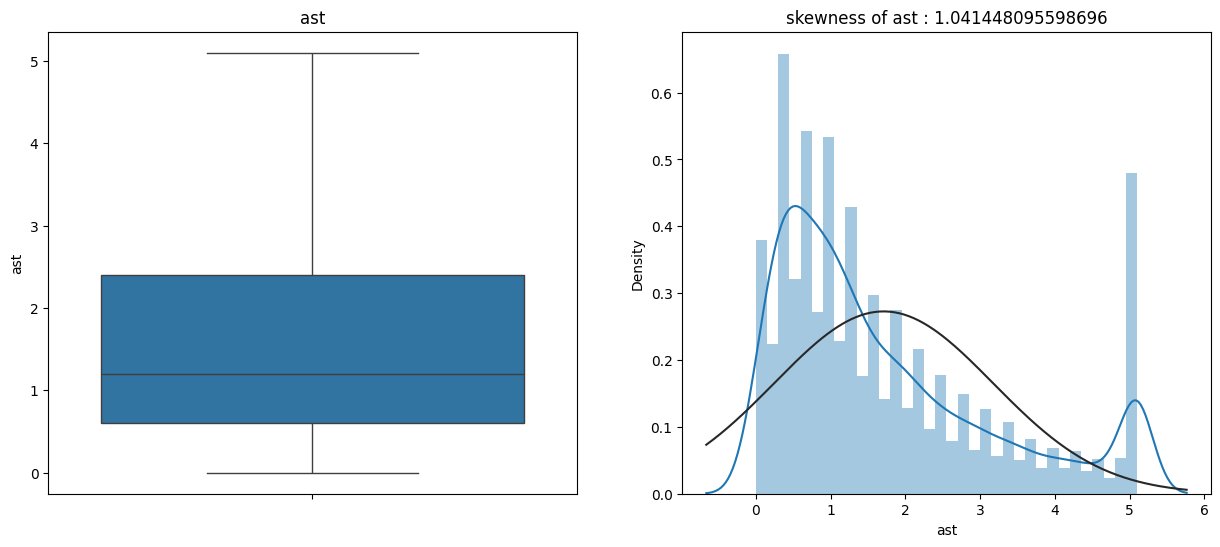

__________________________________________________________________________________________


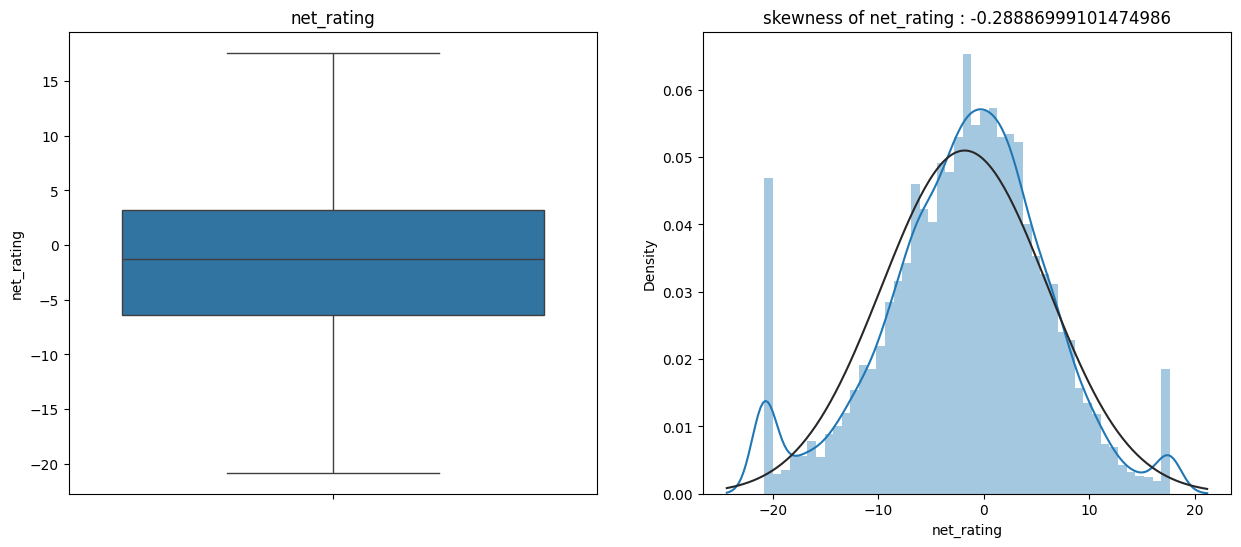

__________________________________________________________________________________________


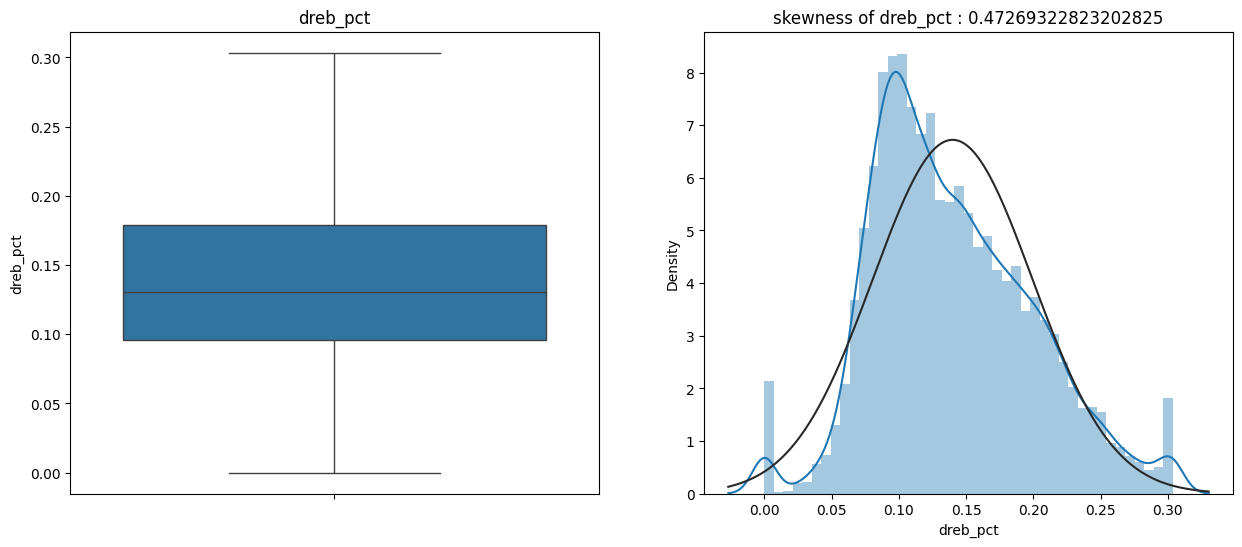

__________________________________________________________________________________________


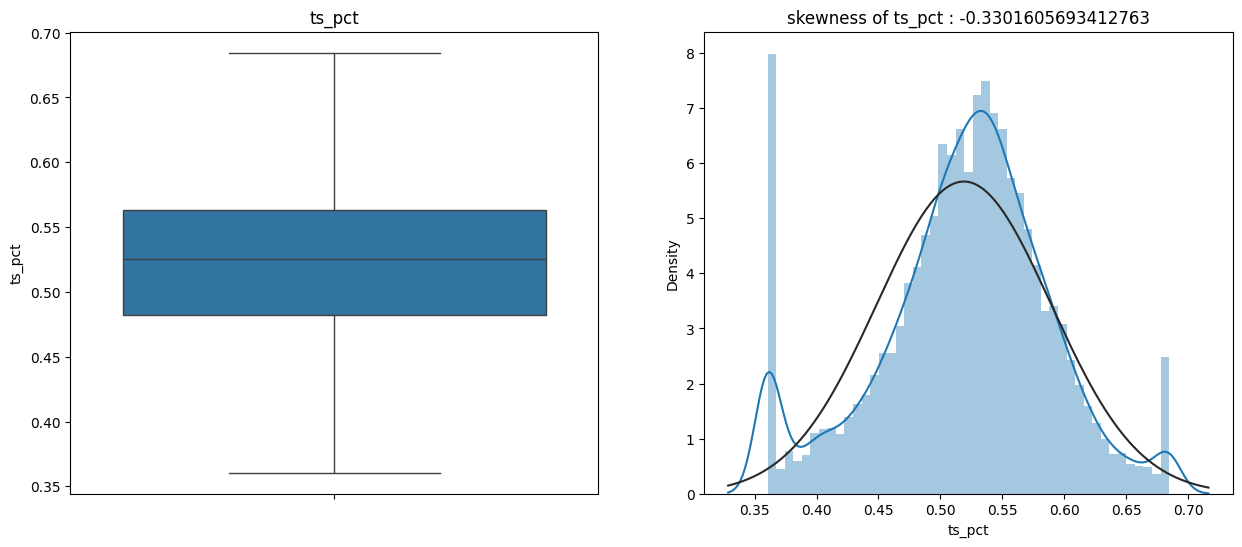

__________________________________________________________________________________________


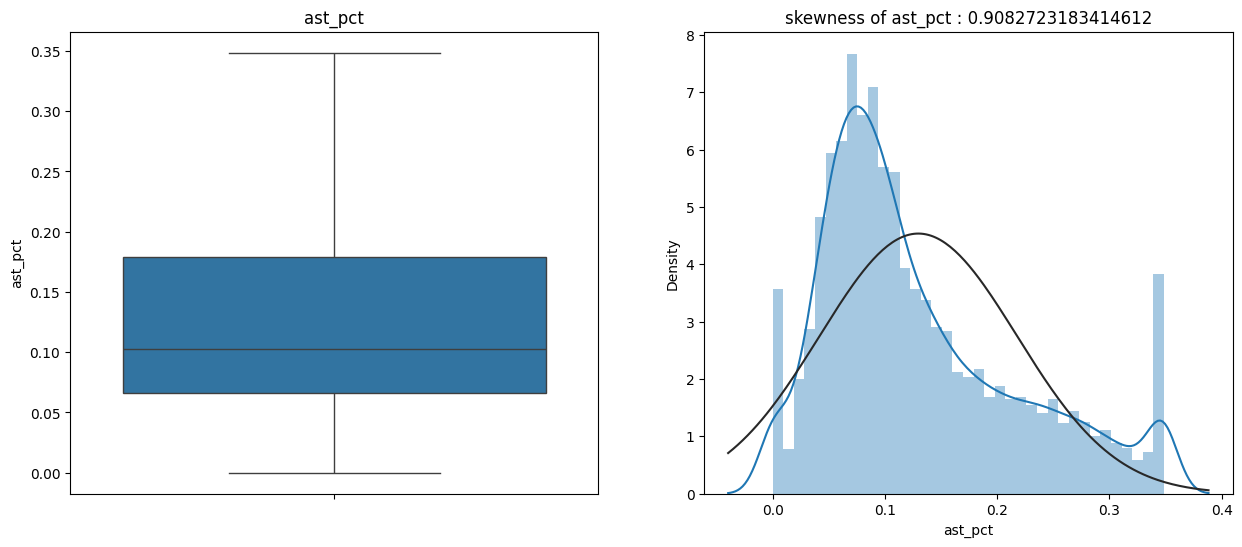

In [60]:
# Using boxplot checking outliers in features after removed using IQR

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

In [61]:
# Import pandas if not already imported
import pandas as pd

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Adjust the display width to avoid truncation

# Display the first 5 rows of the dataset
df.head(20)


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,USA,1996,2,42,64,3.90,1.50,2.4,0.3,0.042,0.071,0.169,0.487,0.2480,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,USA,1994,2,34,4,3.80,1.30,0.3,8.9,0.030,0.111,0.174,0.497,0.0430,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,USA,1993,1,12,41,8.30,6.40,1.9,-8.2,0.106,0.185,0.175,0.512,0.1250,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,USA,1989,1,7,64,10.20,2.80,1.7,-2.7,0.027,0.111,0.206,0.527,0.1250,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,USA,1995,1,22,52,2.80,1.70,0.3,-14.1,0.102,0.169,0.195,0.500,0.0640,1996-97
5,5,Gerald Wilkins,ORL,33.0,198.12,102.058200,USA,1985,2,47,80,10.60,2.20,2.2,-5.8,0.031,0.064,0.203,0.503,0.1430,1996-97
6,6,Gheorghe Muresan,WAS,26.0,231.14,137.438376,USA,1993,2,30,73,10.60,6.60,0.4,6.9,0.098,0.217,0.185,0.618,0.0240,1996-97
7,7,Glen Rice,CHH,30.0,203.20,99.790240,USA,1989,1,4,79,23.35,4.00,2.0,3.2,0.025,0.087,0.272,0.605,0.0880,1996-97
8,8,Glenn Robinson,MIL,24.0,200.66,106.594120,USA,1994,1,1,80,21.10,6.30,3.1,-2.9,0.051,0.144,0.278,0.528,0.1460,1996-97
9,9,Grant Hill,DET,24.0,203.20,102.058200,USA,1994,1,3,80,21.40,9.00,5.1,6.9,0.049,0.232,0.283,0.556,0.3485,1996-97


In [62]:
# Dropping all catagorical features becaue they are not useful for model building
df=df.drop(categorical_features, axis=1)
df.head()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,22.0,193.04,94.800728,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248
1,1,28.0,190.50,86.182480,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043
2,2,26.0,203.20,103.418976,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125
3,3,30.0,203.20,102.058200,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125
4,4,23.0,213.36,119.748288,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064


In [63]:
df = df.drop(columns=['Unnamed: 0'])

In [64]:
df.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.0,193.04,94.800728,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248
1,28.0,190.50,86.182480,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043
2,26.0,203.20,103.418976,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125
3,30.0,203.20,102.058200,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125
4,23.0,213.36,119.748288,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064


In [65]:
df.columns

Index(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

#### Separating Dependant and Independant variables

In [66]:
# Separating independent and dependent variables

# Define the target variable (dependent variable)
dependent_variable = 'pts'

# Define the independent variables by excluding the dependent variable
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data for independent variables (features)
X = df[independent_variables].copy()

# Create the data for dependent variable (target)
y = df[dependent_variable].copy()

#### Feature Manipulation & Selection

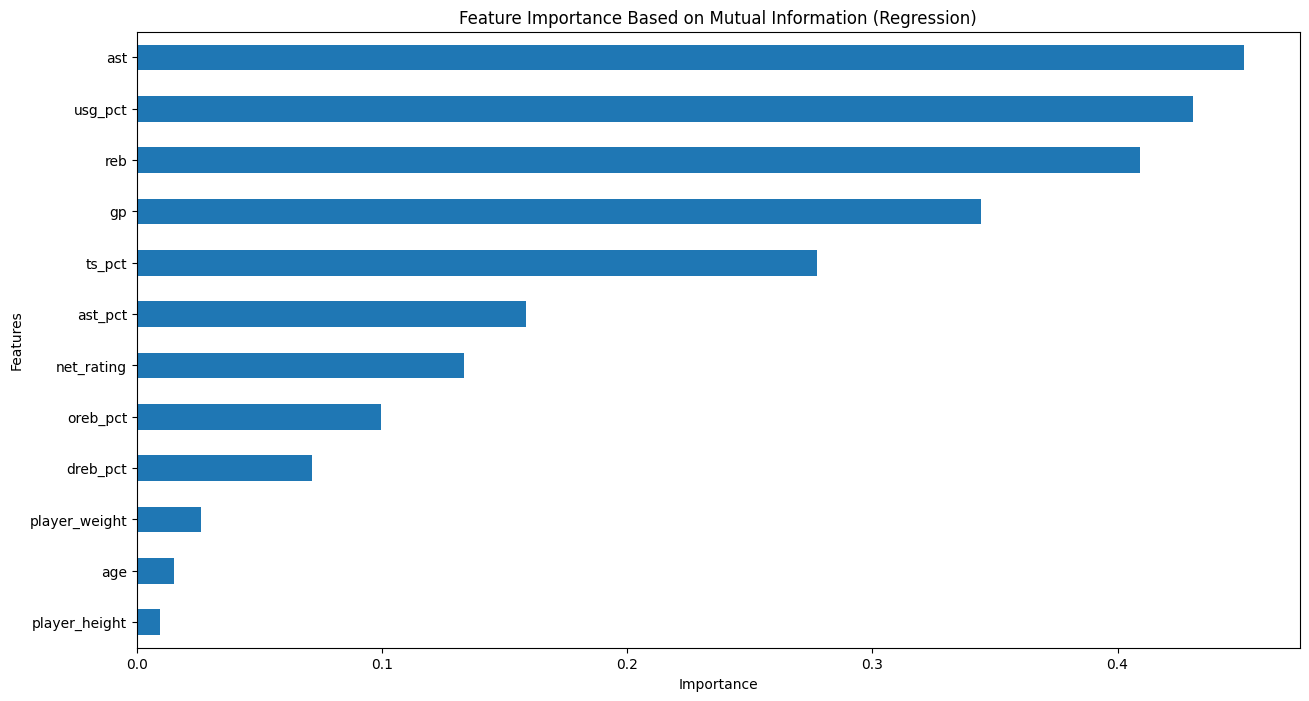

In [67]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import pandas as pd

# Calculate feature importance using mutual information regression
importance = mutual_info_regression(X, y)

# Create a Series for feature importance and sort it
feature_importances = pd.Series(importance, X.columns).sort_values(ascending=True)

# Plotting the feature importance
plt.figure(figsize=(15, 8))
feature_importances.plot(kind='barh')
plt.title("Feature Importance Based on Mutual Information (Regression)")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


### Data Splitting

In [68]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(X, y ,test_size=0.2, random_state=42)

In [69]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (10275, 12)
Shape of X_test : (2569, 12)
Shape of y_train : (10275,)
Shape of y_test : (2569,)


### Data Scaling

In [70]:
# Transforming data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[-8.93544675e-01, -1.16242769e+00, -2.68512815e-01,
         6.67081122e-01, -8.26106849e-01,  3.37118829e-01,
        -7.44631068e-01, -6.03161287e-01,  6.79519567e-01,
        -6.41170712e-01, -1.16598592e+00,  1.45744079e-01],
       [ 2.44818769e-01,  2.20373411e-01, -5.47220954e-01,
        -1.92724841e+00,  8.81886333e-01, -1.23350967e+00,
         3.56859293e-01,  1.86806506e-01, -5.66699558e-01,
         4.91606620e-01,  2.48802217e+00, -2.18897913e-01],
       [ 9.56295922e-01,  2.20373411e-01,  1.12502788e+00,
         9.06557694e-01,  1.30369333e-01,  8.60661663e-01,
         8.41515052e-01,  7.07849094e-01, -4.36497560e-01,
         1.74428967e-01,  1.41764346e-01,  1.23967005e+00],
       [-1.25149350e-01,  2.29457506e+00, -8.25929093e-01,
         8.26732170e-01,  1.70172306e+00, -4.82339520e-01,
         2.24680449e-01, -5.69545637e-01,  1.57233327e+00,
         1.52243399e+00,  7.32454944e-04, -3.65769173e-02],
       [-4.38199298e-01,  1.14224081e+00,  8.4631974

### Model Implementation

In [73]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# 1. **Linear Regression** Model
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict using the test data
lr_predictions = lr_model.predict(X_test)

# Evaluate the Linear Regression model
lr_r2 = r2_score(y_test, lr_predictions)  # R-squared
lr_mae = mean_absolute_error(y_test, lr_predictions)  # MAE

# Print evaluation metrics for Linear Regression
print(f"Linear Regression - R-squared: {lr_r2:.4f}")
print(f"Linear Regression - MAE: {lr_mae:.4f}")

# 2. **Ridge Regression** Model
# Initialize the Ridge Regression model with a default alpha value
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# Predict using the test data
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the Ridge Regression model
ridge_r2 = r2_score(y_test, ridge_predictions)  # R-squared
ridge_mae = mean_absolute_error(y_test, ridge_predictions)  # MAE

# Print evaluation metrics for Ridge Regression
print(f"Ridge Regression - R-squared: {ridge_r2:.4f}")
print(f"Ridge Regression - MAE: {ridge_mae:.4f}")


Linear Regression - R-squared: 0.9110
Linear Regression - MAE: 1.2348
Ridge Regression - R-squared: 0.9110
Ridge Regression - MAE: 1.2349


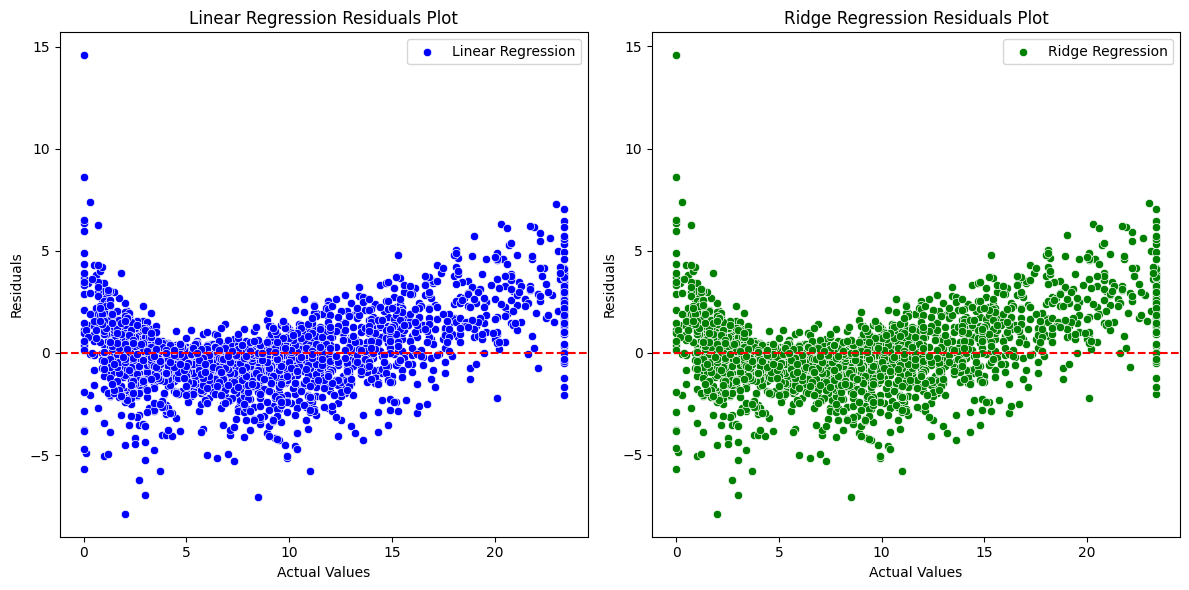

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals for Linear Regression and Ridge Regression
lr_residuals = y_test - lr_predictions
ridge_residuals = y_test - ridge_predictions

# Create a figure for residual plots
plt.figure(figsize=(12, 6))

# Plot the residuals for Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_residuals, color='blue', label='Linear Regression')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0 for reference
plt.title('Linear Regression Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()

# Plot the residuals for Ridge Regression
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=ridge_residuals, color='green', label='Ridge Regression')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0 for reference
plt.title('Ridge Regression Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()
